# Risk Analysis of the Space Shuttle: Pre-Challenger Prediction of Failure

In this document we reperform some of the analysis provided in 
*Risk Analysis of the Space Shuttle: Pre-Challenger Prediction of Failure* by *Siddhartha R. Dalal, Edward B. Fowlkes, Bruce Hoadley* published in *Journal of the American Statistical Association*, Vol. 84, No. 408 (Dec., 1989), pp. 945-957 and available at http://www.jstor.org/stable/2290069. 

On the fourth page of this article, they indicate that the maximum likelihood estimates of the logistic regression using only temperature are: $\hat{\alpha}=5.085$ and $\hat{\beta}=-0.1156$ and their asymptotic standard errors are $s_{\hat{\alpha}}=3.052$ and $s_{\hat{\beta}}=0.047$. The Goodness of fit indicated for this model was $G^2=18.086$ with 21 degrees of freedom. Our goal is to reproduce the computation behind these values and the Figure 4 of this article, possibly in a nicer looking way.

## Technical information on the computer on which the analysis is run

We will be using the python3 language using the pandas, statsmodels, numpy, matplotlib and seaborn libraries.

In [1]:
def print_imported_modules():
    import sys
    for name, val in sorted(sys.modules.items()):
        if(hasattr(val, '__version__')): 
            print(val.__name__, val.__version__)
#        else:
#            print(val.__name__, "(unknown version)")
def print_sys_info():
    import sys
    import platform
    print(sys.version)
    print(platform.uname())

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns

print_sys_info()
print_imported_modules()

3.10.4 (main, Apr  2 2022, 09:04:19) [GCC 11.2.0]
uname_result(system='Linux', node='dev004', release='5.15.0-33-generic', version='#34-Ubuntu SMP Wed May 18 13:34:26 UTC 2022', machine='x86_64')
IPython 8.14.0
IPython.core.release 8.14.0
PIL 10.3.0
PIL.Image 10.3.0
PIL._deprecate 10.3.0
PIL._version 10.3.0
_csv 1.0
_ctypes 1.1.0
_curses b'2.2'
decimal 1.70
_pydev_bundle.fsnotify 0.1.5
_pydevd_frame_eval.vendored.bytecode 0.13.0.dev
argparse 1.1
backcall 0.2.0
cffi 1.15.1
colorama 0.4.4
comm 0.1.4
csv 1.0
ctypes 1.1.0
cycler 0.10.0
dateutil 2.9.0
dateutil._version 2.9.0
debugpy 1.6.7.post1
debugpy.public_api 1.6.7.post1
decimal 1.70
decorator 5.1.1
defusedxml 0.7.1
distutils 3.10.4
django 3.2.25
entrypoints 0.4
executing 1.2.0
executing.version 1.2.0
http.server 0.6
ipykernel 6.25.1
ipykernel._version 6.25.1
ipywidgets 8.1.0
ipywidgets._version 8.1.0
jedi 0.19.0
joblib 1.2.0
joblib.externals.cloudpickle 2.2.0
joblib.externals.loky 3.3.0
json 2.0.9
jupyter_client 7.4.9
jupyter_client._v

## Loading and inspecting data
Let's start by reading data.

In [3]:
data = pd.read_csv("./shuttle.csv")
data

Date  Count  Temperature  Pressure  Malfunction
0     4/12/81      6           66        50            0
1    11/12/81      6           70        50            1
2     3/22/82      6           69        50            0
3    11/11/82      6           68        50            0
4     4/04/83      6           67        50            0
5     6/18/82      6           72        50            0
6     8/30/83      6           73       100            0
7    11/28/83      6           70       100            0
8     2/03/84      6           57       200            1
9     4/06/84      6           63       200            1
10    8/30/84      6           70       200            1
11   10/05/84      6           78       200            0
12   11/08/84      6           67       200            0
13    1/24/85      6           53       200            2
14    4/12/85      6           67       200            0
15    4/29/85      6           75       200            0
16    6/17/85      6           70       200            0
17  7/2903/85      6           81       200            0
18    8/27/85      6           76       200            0
19   10/03/85      6           79       200            0
20   10/30/85      6           75       200            2
21   11/26/85      6           76       200            0
22    1/12/86      6           58       200            1

We know from our previous experience on this data set that filtering data is a really bad idea. We will therefore process it as such.

/home/mlinger@drakai.local/.local/lib/python3.10/site-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


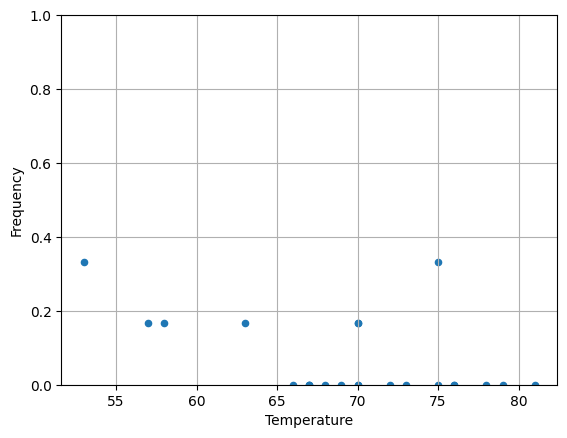

In [4]:
%matplotlib inline
pd.set_option('mode.chained_assignment',None) # this removes a useless warning from pandas
import matplotlib.pyplot as plt

data["Frequency"]=data.Malfunction/data.Count
data.plot(x="Temperature",y="Frequency",kind="scatter",ylim=[0,1])
plt.grid(True)

In [7]:
data["Intercept"] = 1

## Logistic regression

Let's assume O-rings independently fail with the same probability which solely depends on temperature. A logistic regression should allow us to estimate the influence of temperature.

In [11]:
import statsmodels.api as sm

# Create an instance of the link class
logit_link = sm.families.links.logit()

# Use the instance of the link class in the Binomial family
logmodel = sm.GLM(data['Frequency'], data[['Intercept','Temperature']], 
                  family=sm.families.Binomial(link=logit_link),
                  var_weights=data['Count']).fit()

logmodel.summary()


/home/mlinger@drakai.local/.local/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:13: FutureWarning: The logit link alias is deprecated. Use Logit instead. The logit link alias will be removed after the 0.15.0 release.
  warnings.warn(


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Frequency   No. Observations:                   23
Model:                            GLM   Df Residuals:                       21
Model Family:                Binomial   Df Model:                            1
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -23.526
Date:                Tue, 09 Jul 2024   Deviance:                       18.086
Time:                        15:31:00   Pearson chi2:                     30.0
No. Iterations:                     6   Pseudo R-squ. (CS):             0.2344
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       5.0850      3.052      1.666      0.096      -0.898      11.068
Temperature    -0.1156      0.047     -2.458      0.014      -0.208      -0.023
===============================================================================
"""

Good, now I have recovered the asymptotic standard errors $s_{\hat{\alpha}}=3.052$ and $s_{\hat{\beta}}=0.047$.
The Goodness of fit (Deviance) indicated for this model is $G^2=18.086$ with 21 degrees of freedom (Df Residuals).

**I have therefore managed to fully replicate the results of the Dalal *et al.* article**.

## Predicting failure probability
The temperature when launching the shuttle was 31°F. Let's try to estimate the failure probability for such temperature using our model.:

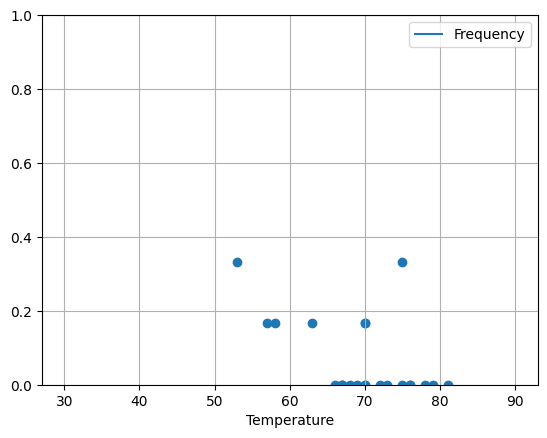

In [12]:
%matplotlib inline
data_pred = pd.DataFrame({'Temperature': np.linspace(start=30, stop=90, num=121), 'Intercept': 1})
data_pred['Frequency'] = logmodel.predict(data_pred)
data_pred.plot(x="Temperature",y="Frequency",kind="line",ylim=[0,1])
plt.scatter(x=data["Temperature"],y=data["Frequency"])
plt.grid(True)

This figure is very similar to the Figure 4 of Dalal *et al.* **I have managed to replicate the Figure 4 of the Dalal *et al.* article.**

## Computing and plotting uncertainty

Following the documentation of [Seaborn](https://seaborn.pydata.org/generated/seaborn.regplot.html), I use regplot.

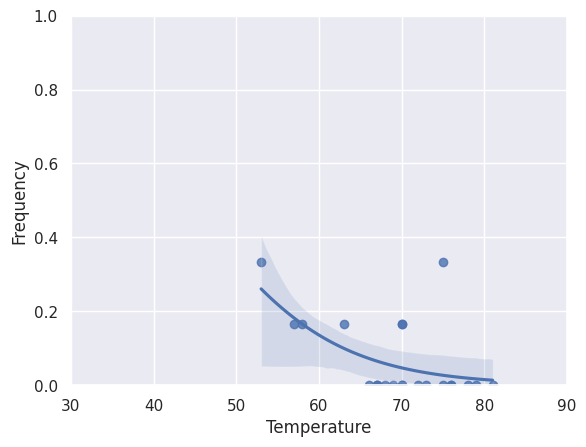

In [13]:
sns.set(color_codes=True)
plt.xlim(30,90)
plt.ylim(0,1)
sns.regplot(x='Temperature', y='Frequency', data=data, logistic=True)
plt.show()

**I think I have managed to correctly compute and plot the uncertainty of my prediction.** Although the shaded area seems very similar to [the one obtained by with R](https://app-learninglab.inria.fr/moocrr/gitlab/moocrr-session3/moocrr-reproducibility-study/tree/master/challenger.pdf), I can spot a few differences (e.g., the blue point for temperature 63 is outside)... Could this be a numerical error ? Or a difference in the statistical method ? It is not clear which one is "right".